In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [2]:
#Set Psudeorandom Seed
seed = 42

In [3]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/5y_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [4]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:37]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [5]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.873015873015873
[[721  87]
 [ 49 214]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       808
           1       0.71      0.81      0.76       263

    accuracy                           0.87      1071
   macro avg       0.82      0.85      0.84      1071
weighted avg       0.88      0.87      0.88      1071



In [7]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8776844070961718
[[759  49]
 [ 82 181]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       808
           1       0.79      0.69      0.73       263

    accuracy                           0.88      1071
   macro avg       0.84      0.81      0.83      1071
weighted avg       0.87      0.88      0.87      1071



In [8]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9066293183940243
[[772  36]
 [ 64 199]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       808
           1       0.85      0.76      0.80       263

    accuracy                           0.91      1071
   macro avg       0.89      0.86      0.87      1071
weighted avg       0.90      0.91      0.90      1071



In [9]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8916900093370682
[[753  55]
 [ 61 202]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       808
           1       0.79      0.77      0.78       263

    accuracy                           0.89      1071
   macro avg       0.86      0.85      0.85      1071
weighted avg       0.89      0.89      0.89      1071



In [10]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.880485527544351
[[778  30]
 [ 98 165]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       808
           1       0.85      0.63      0.72       263

    accuracy                           0.88      1071
   macro avg       0.87      0.80      0.82      1071
weighted avg       0.88      0.88      0.87      1071



In [11]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8842203548085901
[[760  48]
 [ 76 187]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       808
           1       0.80      0.71      0.75       263

    accuracy                           0.88      1071
   macro avg       0.85      0.83      0.84      1071
weighted avg       0.88      0.88      0.88      1071



In [12]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8440709617180205
[[728  80]
 [ 87 176]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       808
           1       0.69      0.67      0.68       263

    accuracy                           0.84      1071
   macro avg       0.79      0.79      0.79      1071
weighted avg       0.84      0.84      0.84      1071



In [13]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8982259570494865
[[774  34]
 [ 75 188]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       808
           1       0.85      0.71      0.78       263

    accuracy                           0.90      1071
   macro avg       0.88      0.84      0.85      1071
weighted avg       0.90      0.90      0.90      1071



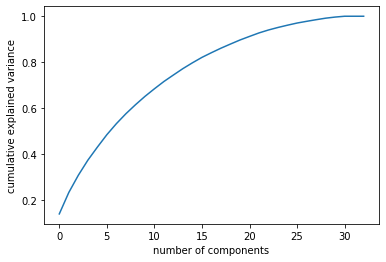

In [14]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [16]:
pca.n_components_

16

In [17]:
pca.explained_variance_ratio_

array([0.14027244, 0.0932444 , 0.07482514, 0.0654608 , 0.05672682,
       0.054284  , 0.04792303, 0.04314031, 0.03891853, 0.0364355 ,
       0.03323456, 0.03175581, 0.02830549, 0.02781404, 0.02519766,
       0.02361979])

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14027244, 0.23351685, 0.30834198, 0.37380278, 0.4305296 ,
       0.4848136 , 0.53273663, 0.57587693, 0.61479546, 0.65123097,
       0.68446553, 0.71622135, 0.74452684, 0.77234088, 0.79753854,
       0.82115833])

In [19]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [20]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8748832866479925
[[725  83]
 [ 51 212]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       808
           1       0.72      0.81      0.76       263

    accuracy                           0.87      1071
   macro avg       0.83      0.85      0.84      1071
weighted avg       0.88      0.87      0.88      1071



In [21]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8487394957983193
[[697 111]
 [ 51 212]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       808
           1       0.66      0.81      0.72       263

    accuracy                           0.85      1071
   macro avg       0.79      0.83      0.81      1071
weighted avg       0.86      0.85      0.85      1071



In [22]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8860877684407096
[[720  88]
 [ 34 229]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       808
           1       0.72      0.87      0.79       263

    accuracy                           0.89      1071
   macro avg       0.84      0.88      0.86      1071
weighted avg       0.90      0.89      0.89      1071



In [23]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[719  89]
 [ 64 199]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       808
           1       0.69      0.76      0.72       263

    accuracy                           0.86      1071
   macro avg       0.80      0.82      0.81      1071
weighted avg       0.86      0.86      0.86      1071



In [24]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.780578898225957
[[614 194]
 [ 41 222]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       808
           1       0.53      0.84      0.65       263

    accuracy                           0.78      1071
   macro avg       0.74      0.80      0.75      1071
weighted avg       0.84      0.78      0.79      1071



In [25]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7609710550887021
[[575 233]
 [ 23 240]]
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       808
           1       0.51      0.91      0.65       263

    accuracy                           0.76      1071
   macro avg       0.73      0.81      0.74      1071
weighted avg       0.85      0.76      0.78      1071



In [26]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7936507936507936
[[688 120]
 [101 162]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       808
           1       0.57      0.62      0.59       263

    accuracy                           0.79      1071
   macro avg       0.72      0.73      0.73      1071
weighted avg       0.80      0.79      0.80      1071



In [27]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8944911297852475
[[731  77]
 [ 36 227]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       808
           1       0.75      0.86      0.80       263

    accuracy                           0.89      1071
   macro avg       0.85      0.88      0.86      1071
weighted avg       0.90      0.89      0.90      1071

